In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
from scipy.stats import norm
import matplotlib.pyplot as plt

# 定义Black-Scholes Put期权定价函数
def bs_put_price(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + 0.5*sigma**2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    put_price = K*np.exp(-r*T)*norm.cdf(-d2) - S*norm.cdf(-d1)
    return put_price

# 获取特斯拉历史数据（假设无拆股调整）
ticker = "TSLA"
start_date = "2020-01-01"
end_date = "2023-10-01"
data = yf.download(ticker, start=start_date, end=end_date)
data = data[["Close"]]


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [29]:

# 生成期权到期日（每月第三个星期五）
exp_dates = pd.date_range(start=start_date, end=end_date, freq='WOM-3FRI')

# 回测参数
initial_capital = 10000  # 初始资金
positions = []          # 记录每期交易
results = []            # 记录每期损益


In [41]:
import datetime
def get_option_history_data(contract_symbol, days_before_expiration=30):
    option = yf.Ticker(contract_symbol)
    option_info = option.info
    option_expiration_date = datetime.datetime.fromtimestamp(option_info["expireDate"])

    start_date = option_expiration_date - datetime.timedelta(days=days_before_expiration)
    option_history = option.history(start=start_date)
    return option_history

#get_option_history_data('TSLA')
option = yf.Ticker('TSLA')
option.history('1mo')



,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-03-12 00:00:00-04:00,247.220001,251.839996,241.100006,248.089996,142215700,0.0,0.0
2025-03-13 00:00:00-04:00,248.130005,248.289993,232.600006,240.679993,114813500,0.0,0.0
2025-03-14 00:00:00-04:00,247.309998,251.580002,240.729996,249.979996,100242300,0.0,0.0
2025-03-17 00:00:00-04:00,245.059998,245.399994,232.800003,238.009995,111900600,0.0,0.0
2025-03-18 00:00:00-04:00,228.160004,230.100006,222.279999,225.309998,111477600,0.0,0.0
2025-03-19 00:00:00-04:00,231.610001,241.410004,229.199997,235.860001,111993800,0.0,0.0
2025-03-20 00:00:00-04:00,233.350006,238.000000,230.050003,236.259995,99028300,0.0,0.0
2025-03-21 00:00:00-04:00,234.990005,249.520004,234.550003,248.710007,132728700,0.0,0.0
2025-03-24 00:00:00-04:00,258.079987,278.640015,256.329987,278.390015,169079900,0.0,0.0


In [37]:
import yfinance as yf
import pandas as pd

# 获取特斯拉期权链数据（示例：2023-10-20到期的期权）
ticker = "TSLA"
expiry = "2023-10-21"
option_chain = yf.Ticker(ticker).option_chain(expiry)

# 提取看跌期权（Puts）数据
puts = option_chain.puts
print(puts[["strike", "lastPrice"]].head())

# 筛选目标行权价（例如买入230 Put，卖出200 Put）
buy_put = puts[puts["strike"] == 230]
sell_put = puts[puts["strike"] == 200]

# 计算净权利金成本
net_cost = buy_put["lastPrice"].values[0] - sell_put["lastPrice"].values[0]


ValueError: Expiration `2023-10-21` cannot be found. Available expirations are: [2025-04-17, 2025-04-25, 2025-05-02, 2025-05-09, 2025-05-16, 2025-05-23, 2025-06-20, 2025-07-18, 2025-08-15, 2025-09-19, 2025-10-17, 2025-11-21, 2025-12-19, 2026-01-16, 2026-03-20, 2026-06-18, 2026-09-18, 2026-12-18, 2027-01-15, 2027-06-17, 2027-12-17]

In [ ]:
[2025-04-17, 2025-04-25, 2025-05-02, 2025-05-09, 2025-05-16, 2025-05-23, 2025-06-20, 2025-07-18, 2025-08-15, 2025-09-19, 2025-10-17, 2025-11-21, 2025-12-19, 2026-01-16, 2026-03-20, 2026-06-18, 2026-09-18, 2026-12-18, 2027-01-15, 2027-06-17, 2027-12-17]


In [30]:

# 回测循环
for i in range(1, len(exp_dates)):
    start_date_period = exp_dates[i-1]  # 上期到期日为当前期开始
    end_date_period = exp_dates[i]      # 当前到期日
    
    # 获取当前期股价数据
    period_data = data.loc[start_date_period:end_date_period]
    if len(period_data) < 5:  # 跳过数据不足的周期
        continue
    
    S0 = period_data.iloc[0]["Close"]  # 期初股价
    ST = period_data.iloc[-1]["Close"] # 期末股价
    
    # 设置行权价（假设买入ATM Put，卖出OTM Put）
    K_long = round(S0 * 0.95)  # 买入行权价 = 95% S0
    K_short = round(S0 * 0.85) # 卖出行权价 = 85% S0
    
    # 计算参数
    T = (end_date_period - start_date_period).days / 365  # 剩余期限（年）
    r = 0.03  # 无风险利率（假设3%）
    sigma = period_data["Close"].pct_change().std() * np.sqrt(252)  # 历史波动率
    
    # 计算权利金
    premium_long = bs_put_price(S0, K_long, T, r, sigma)
    premium_short = bs_put_price(S0, K_short, T, r, sigma)
    net_cost = premium_long - premium_short  # 净权利金成本
    
    # 计算期末损益
    payoff_long = max((K_long - ST).iloc[0], 0)
    payoff_short = -max((K_short - ST).iloc[0], 0)
    net_payoff = ((payoff_long + payoff_short) - net_cost).iloc[0]
    
    # 记录结果
    results.append({
        "Start Date": start_date_period,
        "End Date": end_date_period,
        "S0": S0,
        "ST": ST,
        "K_long": K_long,
        "K_short": K_short,
        "Net Cost": net_cost,
        "Net Payoff": net_payoff
    })


In [33]:

# 转换为DataFrame
results_df = pd.DataFrame(results)

# 计算累计收益
results_df["Cumulative Return"] = results_df["Net Payoff"].cumsum()


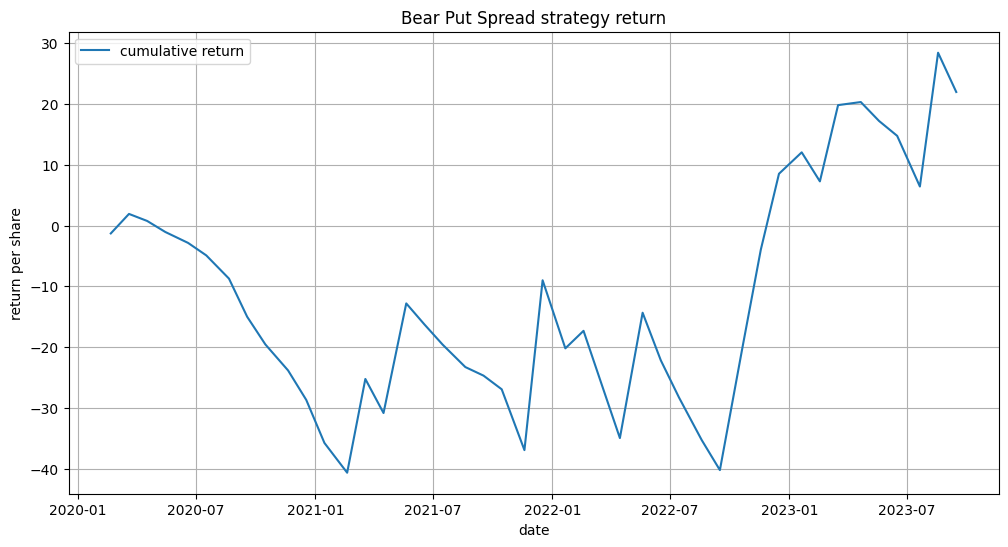

overall return: 21.97 per share
max drawdown: 42.58 per share


In [35]:

# 可视化结果
plt.figure(figsize=(12, 6))
plt.plot(results_df["End Date"], results_df["Cumulative Return"], label="cumulative return")
plt.title("Bear Put Spread strategy return")
plt.xlabel("date")
plt.ylabel("return per share")
plt.legend()
plt.grid(True)
plt.show()

# 输出关键指标
total_return = results_df["Net Payoff"].sum()
max_drawdown = (results_df["Cumulative Return"].cummax() - results_df["Cumulative Return"]).max()
print(f"overall return: {total_return:.2f} per share")
print(f"max drawdown: {max_drawdown:.2f} per share")